In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [23]:
df = pd.read_csv("/content/drive/MyDrive/mental_health_workplace_survey.csv")
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [24]:
categorical_columns = ['Department', 'Country', 'Gender', 'JobRole', 'RemoteWork', 'HasTherapyAccess', 'HasMentalHealthSupport', 'SalaryRange']
# Perform one-hot encoding on all categorical columns at once
df = pd.get_dummies(df, columns=categorical_columns)

In [25]:
df.head()

,EmployeeID,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,...,RemoteWork_Yes,HasTherapyAccess_No,HasTherapyAccess_Yes,HasMentalHealthSupport_No,HasMentalHealthSupport_Yes,SalaryRange_100K+,SalaryRange_40K-60K,SalaryRange_60K-80K,SalaryRange_80K-100K,SalaryRange_<40K
0,1001,50,14,47,3.37,5.06,9.47,4.16,7.0,7.9,...,False,False,True,True,False,False,True,False,False,False
1,1002,36,1,59,7.39,2.00,5.65,3.74,7.2,9.0,...,False,False,True,False,True,False,False,False,True,False
2,1003,29,13,59,7.10,7.17,5.70,8.80,5.2,9.7,...,False,True,False,True,False,False,False,False,True,False
3,1004,42,15,31,4.18,3.76,6.40,4.69,8.7,5.8,...,True,False,True,False,True,False,False,True,False,False
4,1005,40,6,34,8.28,2.34,3.41,2.12,4.2,3.3,...,True,False,True,False,True,False,False,False,False,True


In [26]:
X = df.drop('BurnoutRisk', axis=1)
y = df['BurnoutRisk']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=52 )

In [27]:
scaler = StandardScaler()
# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression on scaled data
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
lr_pred = lr_model.predict(X_test_scaled)
lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

In [28]:
# Train LDA on scaled data
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)

# Predictions
lda_pred = lda_model.predict(X_test_scaled)
lda_prob = lda_model.predict_proba(X_test_scaled)[:, 1]

In [29]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("LDA Accuracy:", accuracy_score(y_test, lda_pred))

Logistic Regression Accuracy: 0.9844444444444445
LDA Accuracy: 0.9555555555555556


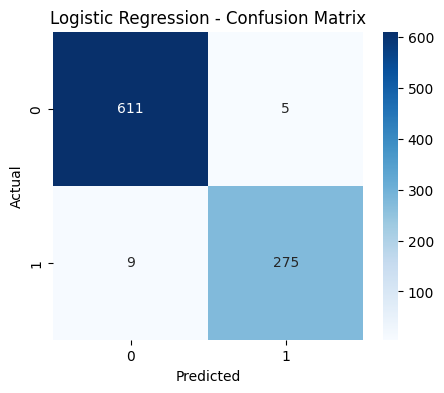

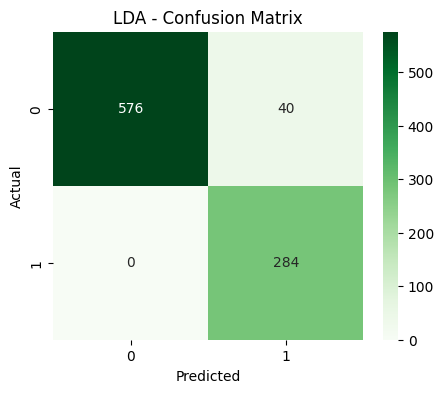

In [30]:
# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# LDA Confusion Matrix
cm_lda = confusion_matrix(y_test, lda_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Greens')
plt.title("LDA - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Logistic Regression AUC: 0.9992397567221512
LDA AUC: 0.9979993597951344


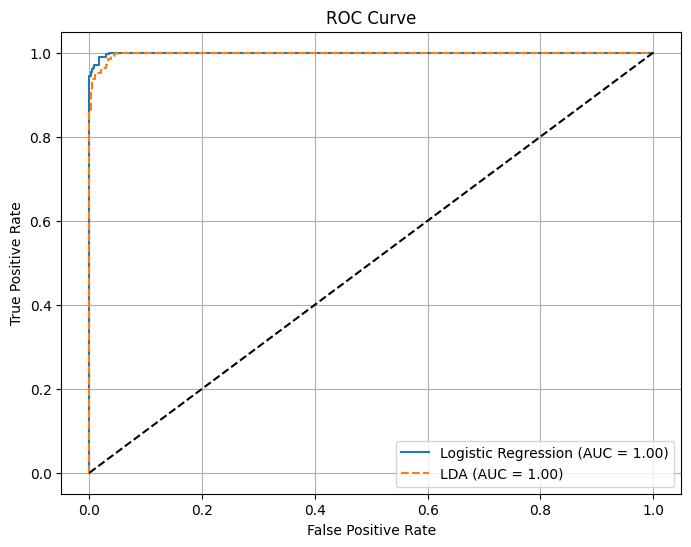

In [31]:
auc_lr = roc_auc_score(y_test, lr_prob)
auc_lda = roc_auc_score(y_test, lda_prob)

print("Logistic Regression AUC:", auc_lr)
print("LDA AUC:", auc_lda)

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_lda, tpr_lda, label=f'LDA (AUC = {auc_lda:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()